In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('spam.csv',encoding='latin-1')[['v1','v2']]
data.columns = ['label','message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


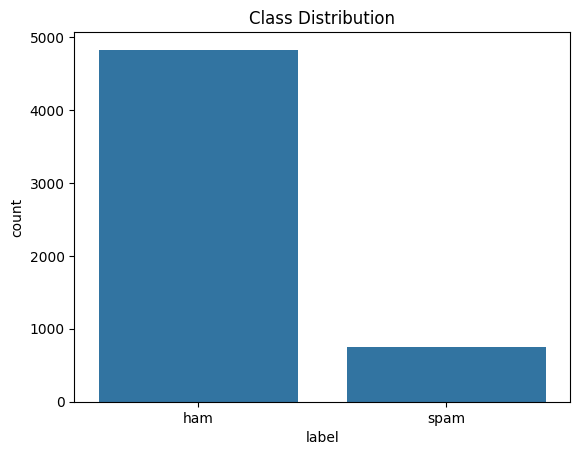

In [5]:
#Data cleaning
#convert lables to binary:ham = 0, spam = 1

data['label_num']=data['label'].map({'ham':0,'spam':1})

#check class balance
sns.countplot(x='label',data=data)
plt.title('Class Distribution')
plt.show()

In [6]:
#we will convet text into numeric features using TF-IDF(Term frequency - inverse document frequecy)

X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label_num'],test_size = 0.2,random_state=42)

#TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english',max_df = 0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
model = LogisticRegression()
model.fit(X_train_tfidf,y_train)

y_pred = model.predict(X_test_tfidf)

In [9]:
print(classification_report(y_test,y_pred,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



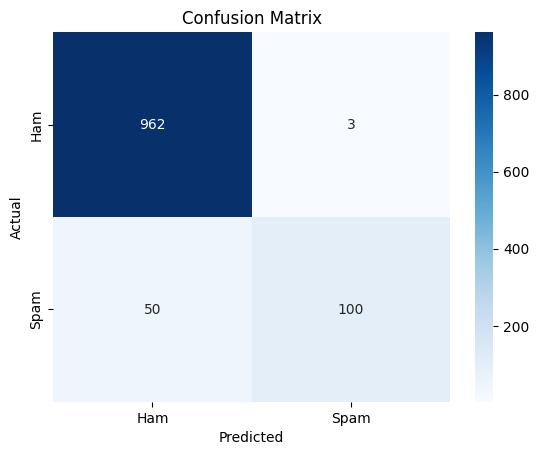

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
custom_messages = ["Win a free iPhone now!", "Let's meet at 6pm", "URGENT! Your account is compromised!"]

# Preprocess
custom_tfidf = vectorizer.transform(custom_messages)
predictions = model.predict(custom_tfidf)

for msg, pred in zip(custom_messages, predictions):
    print(f"Message: '{msg}' → Prediction: {'Spam' if pred == 1 else 'Ham'}")


Message: 'Win a free iPhone now!' → Prediction: Spam
Message: 'Let's meet at 6pm' → Prediction: Ham
Message: 'URGENT! Your account is compromised!' → Prediction: Ham


In [13]:
import joblib

#save model
joblib.dump(model,'spam_classifier.pkl')

#load model
loaded_model = joblib.load('spam_classifier.pkl')